In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

In [2]:
np.set_printoptions(threshold=10)

## Generating Univariate Data

In [3]:
def generate_data(n, l=-100, h=100, m=None, c=None, s=10, seed=None):
    m = m if m else np.random.RandomState(seed).randn(1)
    c = c if c else np.random.RandomState(seed).randint(l, h)
    x = np.random.uniform(l, h, n)
    y = m * x + c
    noise = s * np.random.randn(n) + y.mean()
    y = y + noise
    return x, y

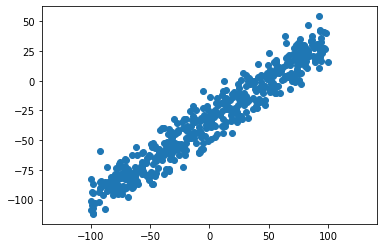

In [4]:
x_train, y_train = generate_data(500, seed=23)
plt.scatter(x_train, y_train)
plt.axis('equal');

## Simple Linear Regression Model

In [5]:
class OLSRegressor:
    def __init__(self):
        self.weight = None
        self.bias = None
        
    def fit(self, x, y):
        x_, y_ = x.mean(), y.mean()
        self.weight = np.sum((x - x_) * (y - y_)) / np.sum((x - x_) ** 2)
        self.bias = y_ - self.weight * x_
    
    def predict(self, x):
        return self.weight * x + self.bias
    
    def plot_fit_line(self, x, y):
        y_pred = self.predict(x)
        plt.scatter(x, y, c='c', ec='k')
        plt.plot(x, y_pred, 'r', lw=3)
        plt.axis('equal');

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        J = 0.5 * np.mean(np.square(y - y_pred))
        return J
    
    def get_weights(self):
        return self.weight, self.bias

In [6]:
model = OLSRegressor()

In [7]:
model.fit(x_train, y_train)

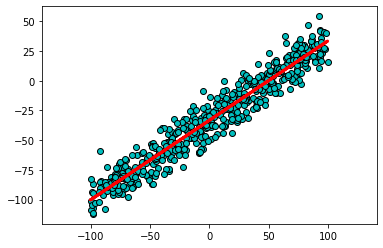

In [8]:
model.plot_fit_line(x_train, y_train)

In [9]:
model.get_weights()

(0.6701117819340343, -33.20590002955218)

## Evaluation

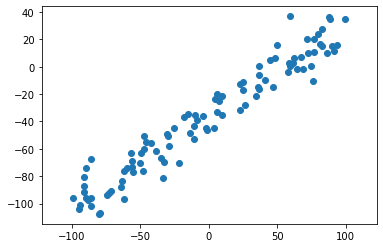

In [10]:
x_test, y_test = generate_data(100, seed=23)
plt.scatter(x_test, y_test)
plt.axis('equal');

In [11]:
model.evaluate(x_test, y_test)

57.77521636225538

In [12]:
y_pred = model.predict(x_test)

In [13]:
test_loss = 0.5 * np.mean((y_pred - y_test) ** 2)
print('test loss : ', test_loss)

test loss :  57.77521636225538


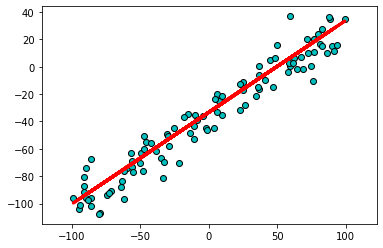

In [14]:
model.plot_fit_line(x_test, y_test)

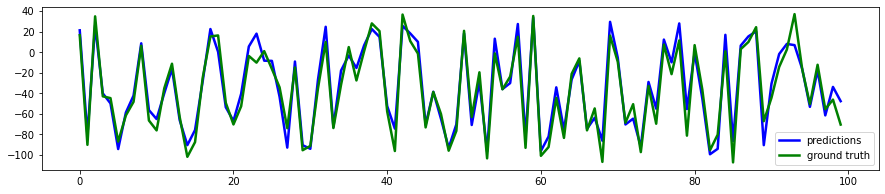

In [15]:
plt.figure(figsize=(15,3))
plt.plot(y_pred, 'b', lw=2.5, label='predictions')
plt.plot(y_test, 'g', lw=2.5, label='ground truth')
plt.legend(loc='best')